In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor


# Data Exploration:-

In [3]:
df=pd.read_csv("Processed_Flipdata - Processed_Flipdata.csv")

In [4]:
df

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


In [5]:
df = df.drop(['Unnamed: 0'],axis=1)

In [6]:
df.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


In [7]:
df['Prize'] = df['Prize'].str.replace(',', '').astype(int)

In [8]:
df['Rear Camera'] = df['Rear Camera'].str.replace('MP', '').astype(int)
df['Front Camera'] = df['Front Camera'].str.replace('MP', '').astype(int)

In [9]:
df.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,1,16.76,G37,8999


In [10]:
# For 'Mobile Height', we can clip extreme values
# Assuming normal phone height is between 14 cm to 18 cm
df['Mobile Height'] = np.clip(df['Mobile Height'], 14, 18)


In [11]:
df

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,1,16.76,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50,12,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,LAVA Z21,Cyan,32,2,3100,5,2,0,14.00,Octa Core,5998
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50,8,0,16.76,MediaTek Helio G35,9990
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50,32,0,16.26,"Exynos 1380, Octa Core",38999


In [12]:
# For 'Battery_', assuming realistic values between 3000 and 7000 mAh
df['Battery_'] = np.clip(df['Battery_'], 3000, 7000)


In [13]:
df

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,1,16.76,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50,12,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,LAVA Z21,Cyan,32,2,3100,5,2,0,14.00,Octa Core,5998
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50,8,0,16.76,MediaTek Helio G35,9990
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50,32,0,16.26,"Exynos 1380, Octa Core",38999


# Data Preprocessing:-

In [15]:
categorical_cols = ['Model', 'Colour', 'Processor_']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Step 6: Final check
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Columns: 590 entries, Memory to Processor__snapdragon 888
dtypes: bool(582), float64(1), int64(7)
memory usage: 341.4 KB
None
   Memory  RAM  Battery_  Rear Camera  Front Camera  AI Lens  Mobile Height  \
0      64    4      6000           13             5        1          16.76   
1      64    4      6000           13             5        1          16.76   
2     128    8      5000           50            16        0          16.64   
3      32    2      5000            8             5        0          16.56   
4     128    8      5000           50             5        1          16.76   

   Prize  Model_APPLE iPhone 12  Model_APPLE iPhone 14 Plus  ...  \
0   7299                  False                       False  ...   
1   7299                  False                       False  ...   
2  11999                  False                       False  ...   
3   5649                  False                       F

In [16]:
df.head()

,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Prize,Model_APPLE iPhone 12,Model_APPLE iPhone 14 Plus,...,Processor__Unisoc Spreadtrum SC9863A1,Processor__Unisoc T606,Processor__Unisoc T610,Processor__Unisoc T612,Processor__Unisoc T612 processor,Processor__Unisoc T616,Processor__Unisoc Tiger T612 (12 nm),Processor__Unisoc Tiger T616,Processor__ios,Processor__snapdragon 888
0,64,4,6000,13,5,1,16.76,7299,False,False,...,True,False,False,False,False,False,False,False,False,False
1,64,4,6000,13,5,1,16.76,7299,False,False,...,True,False,False,False,False,False,False,False,False,False
2,128,8,5000,50,16,0,16.64,11999,False,False,...,False,False,False,False,False,False,False,False,False,False
3,32,2,5000,8,5,0,16.56,5649,False,False,...,False,False,False,False,False,False,False,False,False,False
4,128,8,5000,50,5,1,16.76,8999,False,False,...,False,False,False,False,False,False,False,False,False,False


# Feature Extraction:-

In [18]:
# Calculate correlation matrix
corr_matrix = df.corr()


In [19]:
price_corr = corr_matrix['Prize'].sort_values(ascending=False)
print("Top 10 Features most correlated with Price:")
print(price_corr.head(10))

Top 10 Features most correlated with Price:
Prize                          1.000000
Memory                         0.566660
Front Camera                   0.532321
RAM                            0.532024
Model_APPLE iPhone 14 Plus     0.448522
Rear Camera                    0.410367
Processor__ios                 0.294330
Model_Google Pixel 7           0.275402
Processor__Google Tensor G2    0.275402
Colour_Starlight               0.258474
Name: Prize, dtype: float64


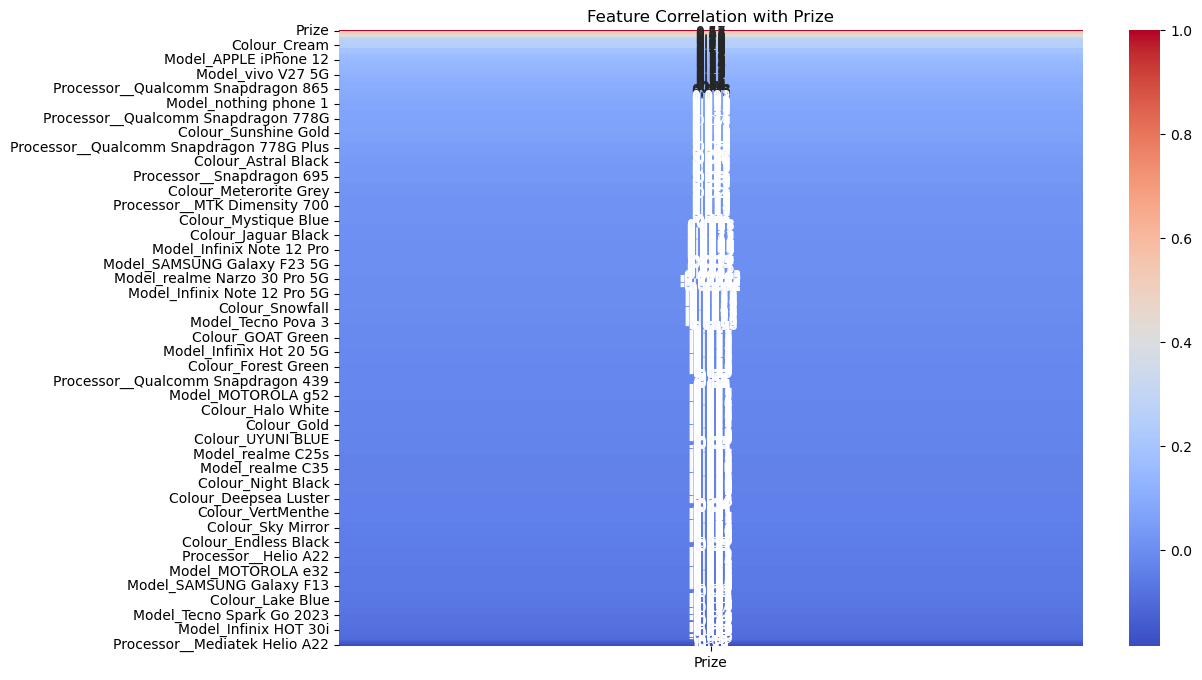

In [20]:
# Visualize correlations with heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix[['Prize']].sort_values(by='Prize', ascending=False), annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Prize')
plt.show()

In [21]:
# Step 2: Feature Importance via Random Forest

# Separate features and target
X = df.drop('Prize', axis=1)
y = df['Prize']

# Train a random forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

# Sort and display top 10 important features
important_features = feature_importances.sort_values(ascending=False)
print("\nTop 10 Important Features from Random Forest:")
print(important_features.head(10))



Top 10 Important Features from Random Forest:
Front Camera                    0.485892
Battery_                        0.098286
Memory                          0.073703
Model_APPLE iPhone 14 Plus      0.061383
Model_Google Pixel 7            0.040060
Processor__Google Tensor G2     0.039849
Rear Camera                     0.032445
Mobile Height                   0.031526
RAM                             0.028533
Model_MOTOROLA Edge 30 Ultra    0.005795
dtype: float64


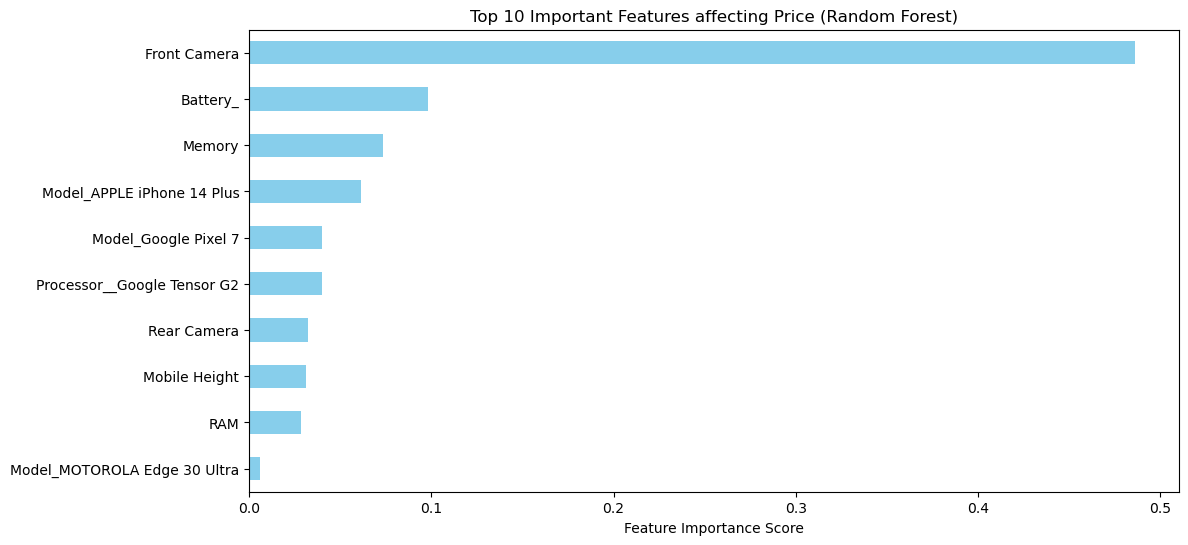

In [22]:
# Visualize
plt.figure(figsize=(12,6))
important_features.head(10).plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 Important Features affecting Price (Random Forest)')
plt.xlabel('Feature Importance Score')
plt.show()

In [23]:
# Step 1: Separate features and target
X = df.drop('Prize', axis=1)
y = df['Prize']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 97736919593251472670720.00
R² Score: -709123441228483.8750


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


In [26]:
## Step 1: Predict on the test set
y_pred = model.predict(X_test)

# Step 2: Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 3: Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 95600161384.50
Mean Squared Error (MSE): 97736919593251472670720.00
Root Mean Squared Error (RMSE): 312629044705.14
R² Score: -709123441228483.8750


# Model Building:-

In [28]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2


(2232.896216467585, 4944.175448499562, 0.8226419348931608)

# Model Evaluation:-

Model Evaluation Metrics:
Mean Absolute Error (MAE): ₹2232.90
Root Mean Squared Error (RMSE): ₹4944.18
R² Score: 0.82


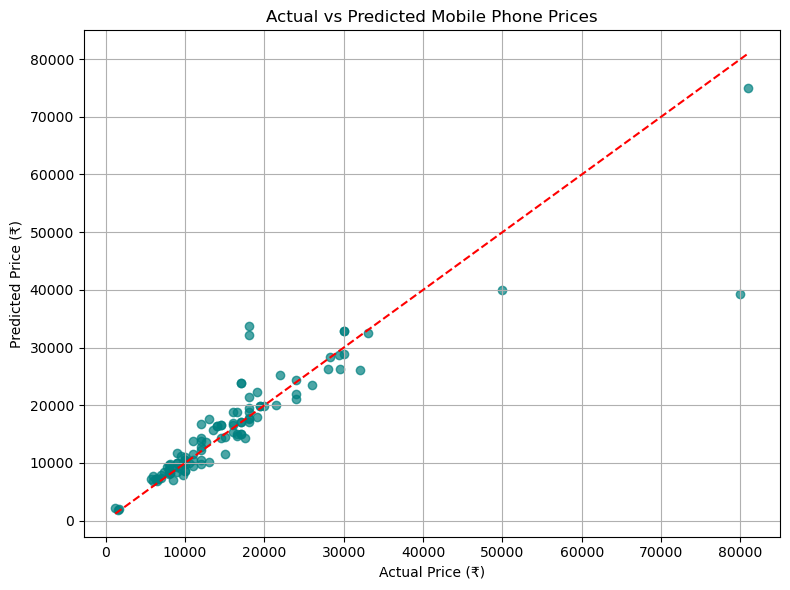

In [30]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print metrics
print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): ₹{mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ₹{rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel("Actual Price (₹)")
plt.ylabel("Predicted Price (₹)")
plt.title("Actual vs Predicted Mobile Phone Prices")
plt.grid(True)
plt.tight_layout()
plt.show()


# Feature Importance Analysis:-

### Compare with Correlation Analysis

In [33]:
# Show top features from correlation matrix
corr_with_price = df.corr()['Prize'].sort_values(ascending=False)
print("Top features by correlation:\n", corr_with_price.head(10))

Top features by correlation:
 Prize                          1.000000
Memory                         0.566660
Front Camera                   0.532321
RAM                            0.532024
Model_APPLE iPhone 14 Plus     0.448522
Rear Camera                    0.410367
Processor__ios                 0.294330
Model_Google Pixel 7           0.275402
Processor__Google Tensor G2    0.275402
Colour_Starlight               0.258474
Name: Prize, dtype: float64


In [34]:
### Use Random Forest Feature Importance

In [35]:
# Already trained: rf = RandomForestRegressor()
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top features by model importance:\n", importances.head(10))

Top features by model importance:
 Front Camera                    0.485892
Battery_                        0.098286
Memory                          0.073703
Model_APPLE iPhone 14 Plus      0.061383
Model_Google Pixel 7            0.040060
Processor__Google Tensor G2     0.039849
Rear Camera                     0.032445
Mobile Height                   0.031526
RAM                             0.028533
Model_MOTOROLA Edge 30 Ultra    0.005795
dtype: float64


### Visualize Feature Importance

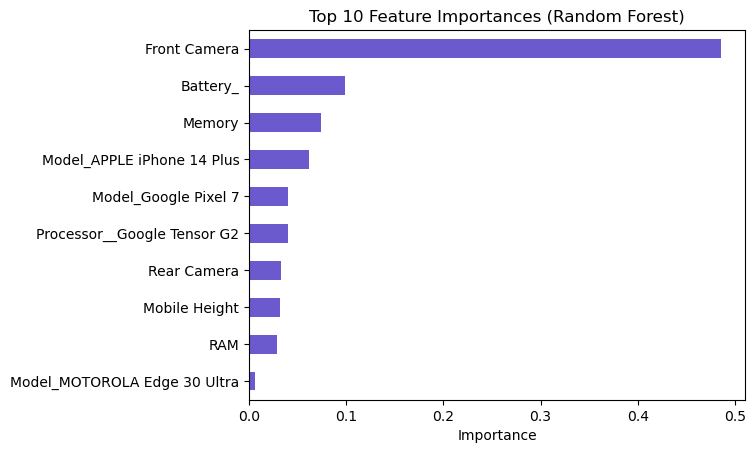

In [37]:
# Bar chart of top 10 important features
importances.head(10).plot(kind='barh', color='slateblue')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()


In [70]:
df.to_csv("/Users/admin/Desktop/P4.csv",index=False)